In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [79]:
import pandas as pd
#masukin data yang kalian udah cari dan udah di add di notebooknya
food_price_file = '/kaggle/input/avocado-prices/avocado.csv'
food_price_data = pd.read_csv(food_price_file)

In [80]:
food_price_data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [81]:
food_price_data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [82]:
# pilih predictions target ato y(dari index yang muncul di columns
y = food_price_data.AveragePrice


In [83]:
food_price_features = [ 'AveragePrice' , 'Total Volume', 'Total Bags']

In [84]:
X = food_price_data[food_price_features]


In [85]:
X.describe( )

,AveragePrice,Total Volume,Total Bags
count,18249.000000,1.824900e+04,1.824900e+04
mean,1.405978,8.506440e+05,2.396392e+05
std,0.402677,3.453545e+06,9.862424e+05
min,0.440000,8.456000e+01,0.000000e+00
25%,1.100000,1.083858e+04,5.088640e+03
50%,1.370000,1.073768e+05,3.974383e+04
75%,1.660000,4.329623e+05,1.107834e+05
max,3.250000,6.250565e+07,1.937313e+07


In [86]:
X.head( )

,AveragePrice,Total Volume,Total Bags
0,1.33,64236.62,8696.87
1,1.35,54876.98,9505.56
2,0.93,118220.22,8145.35
3,1.08,78992.15,5811.16
4,1.28,51039.60,6183.95


In [87]:
from sklearn.tree import DecisionTreeRegressor
food_price_model = DecisionTreeRegressor(random_state=1)
food_price_model.fit(X, y)


DecisionTreeRegressor(random_state=1)

In [88]:
print("Making predictions for the food price:")
print(X.head())
print("The predictions are")
print(food_price_model.predict(X.head()))

Making predictions for the food price:
   AveragePrice  Total Volume  Total Bags
0          1.33      64236.62     8696.87
1          1.35      54876.98     9505.56
2          0.93     118220.22     8145.35
3          1.08      78992.15     5811.16
4          1.28      51039.60     6183.95
The predictions are
[1.33 1.35 0.93 1.08 1.28]


In [89]:
from sklearn.metrics import mean_absolute_error

predicted_food_price = food_price_model.predict(X)
mean_absolute_error(y, predicted_food_price)

1.5646241859615451e-15

In [90]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
food_model = DecisionTreeRegressor()
food_price_model.fit(train_X, train_y)
val_predictions = food_price_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


6.136313828733986e-05


In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


In [92]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [93]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)


In [94]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=250, random_state=1)

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 2.9651545037931953e-05


In [96]:
#Train Decision Tree on Classification Task
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets


In [97]:
#Visualizing the Decision Tree in Regression Task
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [98]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 1.46
|   |--- feature_0 <= 1.12
|   |   |--- feature_0 <= 0.91
|   |   |   |--- value: [0.79]
|   |   |--- feature_0 >  0.91
|   |   |   |--- value: [1.02]
|   |--- feature_0 >  1.12
|   |   |--- feature_0 <= 1.28
|   |   |   |--- value: [1.20]
|   |   |--- feature_0 >  1.28
|   |   |   |--- value: [1.37]
|--- feature_0 >  1.46
|   |--- feature_0 <= 1.91
|   |   |--- feature_0 <= 1.67
|   |   |   |--- value: [1.56]
|   |   |--- feature_0 >  1.67
|   |   |   |--- value: [1.79]
|   |--- feature_0 >  1.91
|   |   |--- feature_0 <= 2.28
|   |   |   |--- value: [2.06]
|   |   |--- feature_0 >  2.28
|   |   |   |--- value: [2.51]



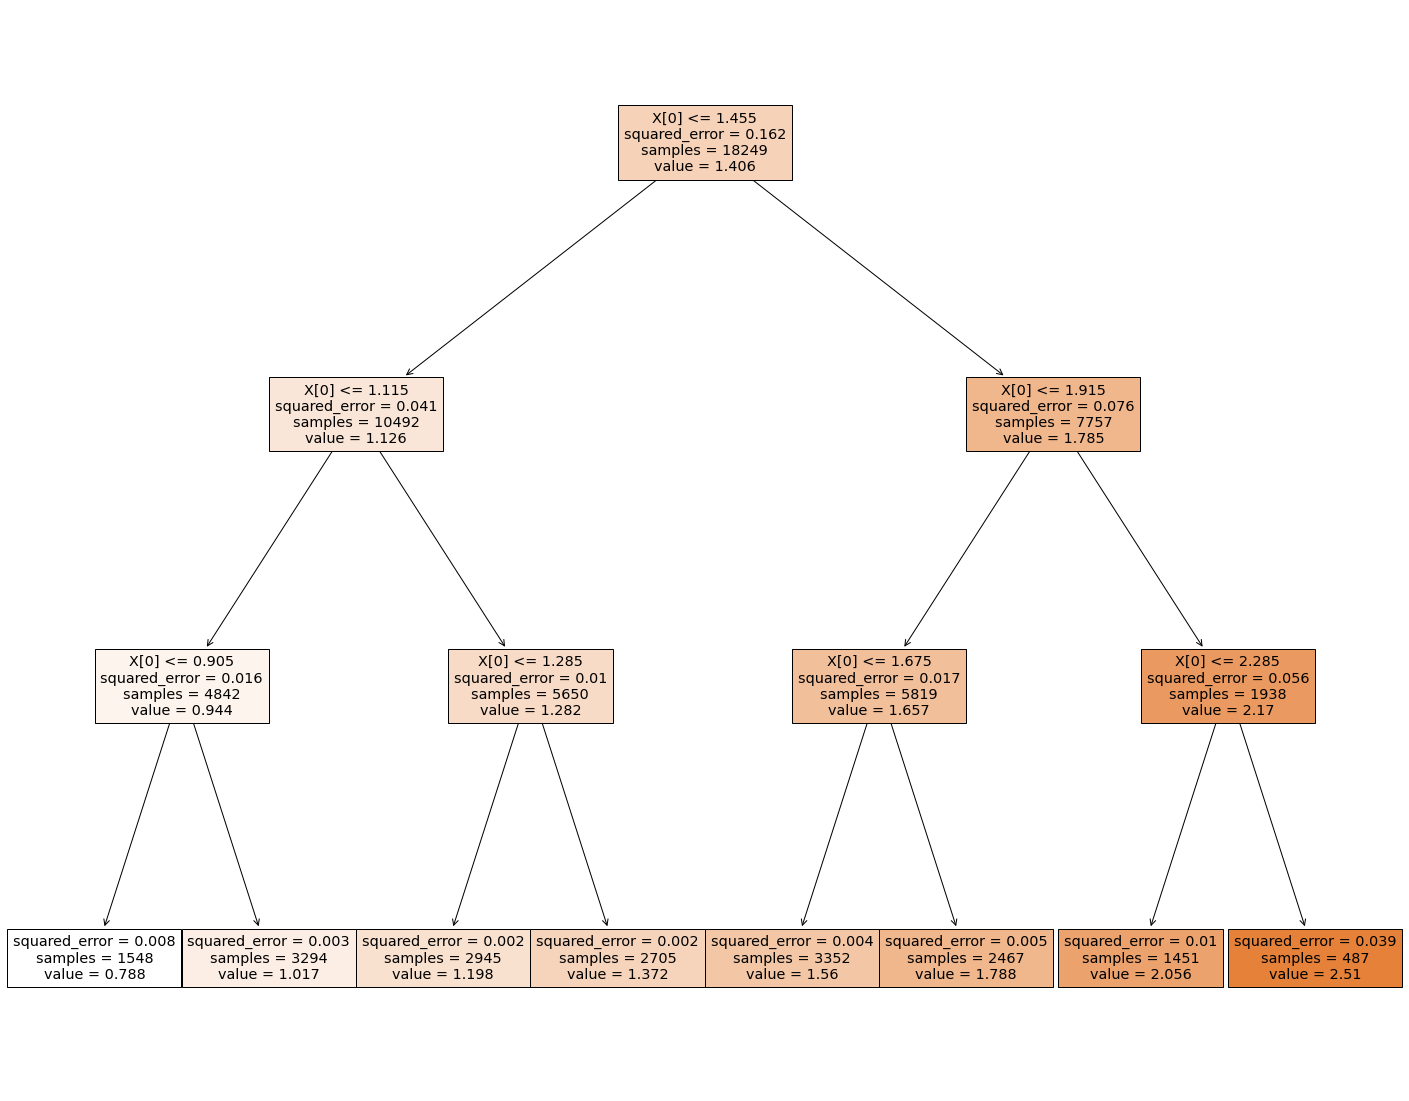

In [99]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)